# UNIT-1# DATA PREPROCESSING

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
traindf= pd.read_csv(r'C:\Users\kshit\Downloads\P39-Fashion-MNIST-Datasets\fashion-mnist_train.csv')

In [3]:
testdf= pd.read_csv(r'C:\Users\kshit\Downloads\P39-Fashion-MNIST-Datasets\fashion-mnist_test.csv')

In [4]:
traindf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
testdf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# UNIT-2# DATA VISUALISATION

In [6]:
traindf.shape

(60000, 785)

In [7]:
testdf.shape

(10000, 785)

In [8]:
training = np.array(traindf,dtype='float32')
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
testing =np.array(testdf,dtype='float32')
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

2.0

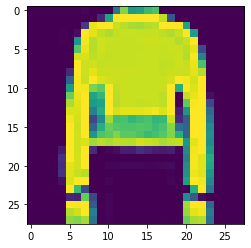

In [10]:
import random 
i=random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label

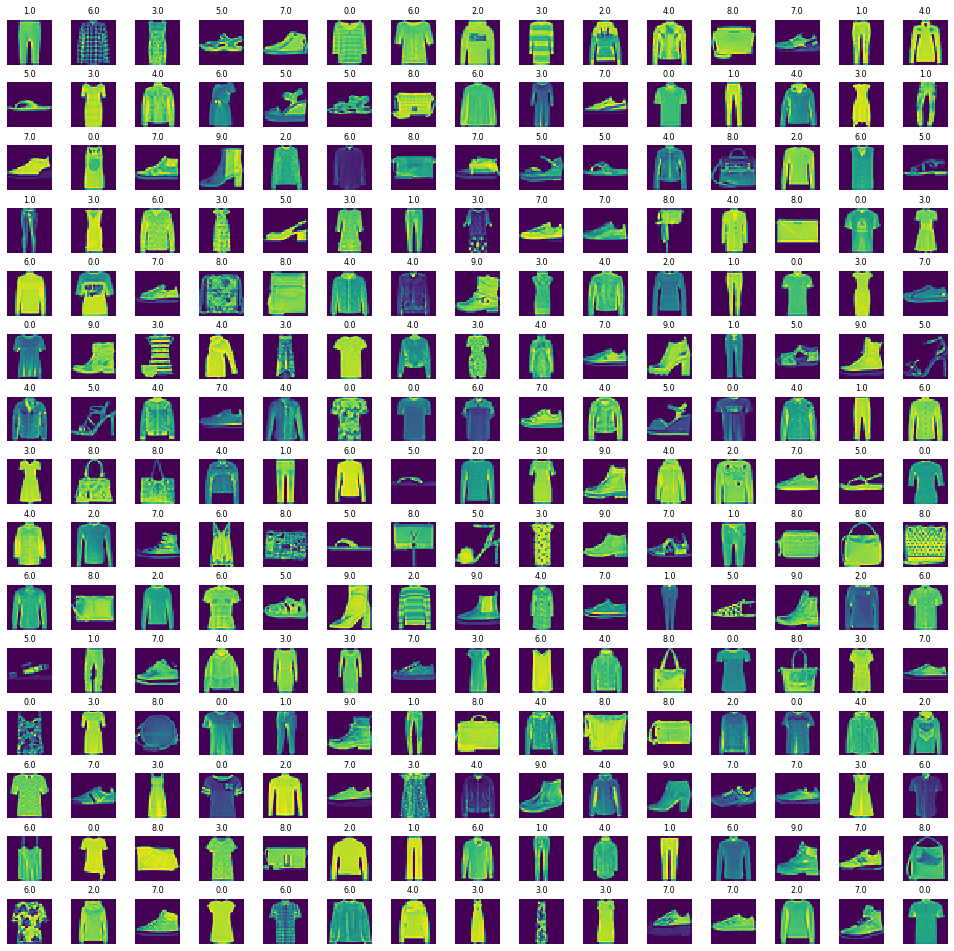

In [11]:
#VIEWING IN GRID FORMAT
#defining the dimensions of the grid 
W_grid=15
L_grid=15
 
#subplot returns the fig obejct and the axes object
#we can use the axes object to plot specific figures at specific locations
fig, axes= plt.subplots(L_grid,W_grid ,figsize= (17,17))

axes = axes.ravel() #flaten the 15x15 matrix into 225 array

n_training= len(training) #length of training set

for i in np.arange(0, W_grid*L_grid): #create empty space variables
    
    index=np.random.randint(0,n_training) #select a random number
    #read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)    

# UNIT-3# MODEL TRAINING

In [12]:
X_train= training[:, 1:]/255
y_train= training[:, 0]

In [13]:
X_test= testing[:, 1:]/255
y_test= testing[:, 0]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_validate,y_train,y_validate= train_test_split(X_train, y_train,test_size=0.2,random_state=12345)

In [15]:
X_train= X_train.reshape(X_train.shape[0],*(28,28,1))
X_test= X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate= X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
X_validate.shape

(12000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

# UNIT-4#  APPLYING THE CNN

In [19]:
import keras

Using TensorFlow backend.


In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
cnn_model= Sequential()

In [42]:
cnn_model.add(Conv2D(64,3,3,input_shape=(56,56,1),activation='relu'))

C:\Users\kshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(56, 56, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


ValueError: Input 0 is incompatible with layer conv2d_6: expected ndim=4, found ndim=2

In [23]:
cnn_model.add(MaxPooling2D(2,2))

In [24]:
cnn_model.add(Flatten())

In [25]:
cnn_model.add(Dense(output_dim=32,activation='relu'))

C:\Users\kshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [26]:
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))

C:\Users\kshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [27]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [28]:
epochs=50

In [29]:
cnn_model.fit(X_train,
             y_train,
             batch_size=512,
             nb_epoch=epochs,
             verbose=1,
             validation_data=(X_validate,y_validate))

Instructions for updating:
Use tf.cast instead.


C:\Users\kshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 493us/step - loss: 1.3639 - acc: 0.1955 - val_loss: 0.7885 - val_acc: 0.7127
Epoch 2/50
48000/48000 [==============================] - 23s 480us/step - loss: 0.5190 - acc: 0.8173 - val_loss: 0.4437 - val_acc: 0.8446
Epoch 3/50
48000/48000 [==============================] - 23s 479us/step - loss: 0.4209 - acc: 0.8526 - val_loss: 0.4081 - val_acc: 0.8585
Epoch 4/50
48000/48000 [==============================] - 23s 488us/step - loss: 0.4001 - acc: 0.8597 - val_loss: 0.3939 - val_acc: 0.8605
Epoch 5/50
48000/48000 [==============================] - 21s 443us/step - loss: 0.3722 - acc: 0.8705 - val_loss: 0.3618 - val_acc: 0.8744
Epoch 6/50
48000/48000 [==============================] - 22s 465us/step - loss: 0.3546 - acc: 0.8774 - val_loss: 0.3551 - val_acc: 0.8753
Epoch 7/50
48000/48000 [==============================] - 23s 472us/step - loss: 0.3434 - acc: 0.8808 - val_loss: 0.

# UNIT-5# EVALUATING THE MODEL 

In [30]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 197us/step
Test Accuracy: 0.912


In [31]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

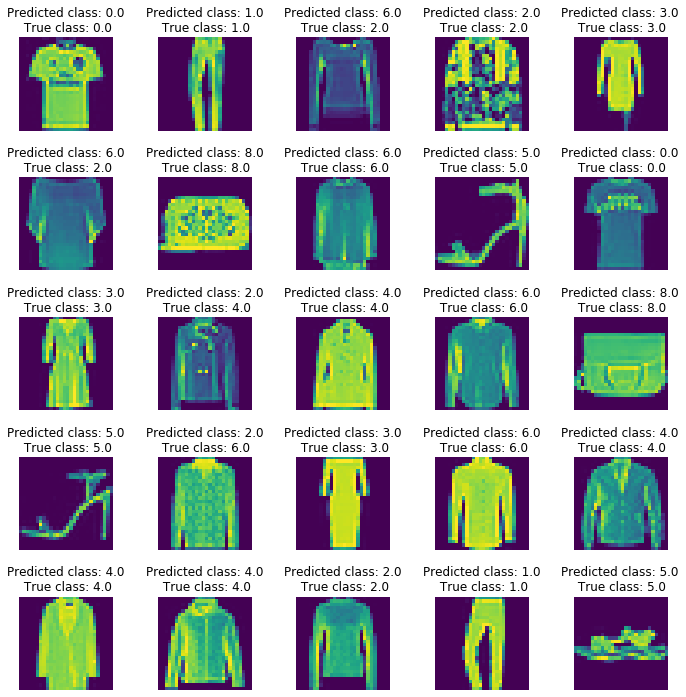

In [32]:
L=5
W=5
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted class: {:0.1f}\n True class: {:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.5)        

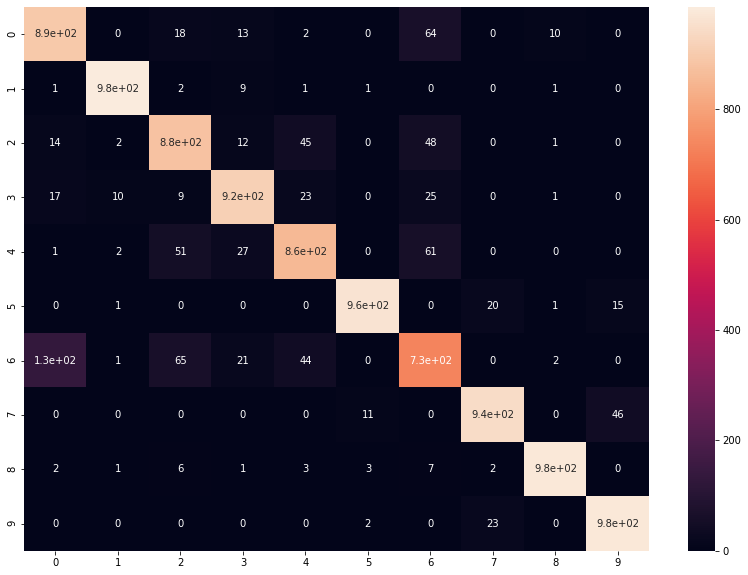

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True) #to show the no. of samples that have been correctly classified and misclassified too.
#sum the diagonal element to get the total correct values

In [34]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class: {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    Class: 0       0.84      0.89      0.87      1000
    Class: 1       0.98      0.98      0.98      1000
    Class: 2       0.85      0.88      0.87      1000
    Class: 3       0.92      0.92      0.92      1000
    Class: 4       0.88      0.86      0.87      1000
    Class: 5       0.98      0.96      0.97      1000
    Class: 6       0.78      0.73      0.76      1000
    Class: 7       0.95      0.94      0.95      1000
    Class: 8       0.98      0.97      0.98      1000
    Class: 9       0.94      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [35]:
#the foll. 10 labels is as follows:
#0 ->t-shirt/top
#1 ->trouser
#2 ->pullover
#3 ->dress
#4 ->coat
#5 ->sandal
#6 ->shirt
#7 ->sneaker
#8 ->bag
#9 ->ankle boot